In [3]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\social_network_add.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.shape

(400, 5)

In [8]:
df.drop('User ID',axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [10]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [13]:
#train test split
from sklearn.model_selection import train_test_split
X=df.drop('Purchased',axis=1)
y=df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train

,Gender,Age,EstimatedSalary
258,0,58,95000
177,1,25,22000
119,1,41,59000
194,1,28,89000
229,0,42,80000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [ ]:
#as estimated salary values are high so model will dominate this side.
#applying standarscaler
#Standardization, also known as z-score normalization, is a acommonly used technique in feature scaling.It involves transforming the features in a dataset so that they have a mean of zero and a standard deviation of one.
#Xnew=Xi-Xmean/standard deviation

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
X_train_scaled

array([[-0.97785703,  2.0052225 ,  0.72479792],
       [ 1.02264438, -1.22740379, -1.43119212],
       [ 1.02264438,  0.33993017, -0.33843005],
       [ 1.02264438, -0.93352867,  0.54759326],
       [-0.97785703,  0.43788855,  0.28178627],
       [-0.97785703,  0.43788855,  1.10874135],
       [-0.97785703,  0.82972204,  0.75433203],
       [-0.97785703,  0.92768041,  1.2564119 ],
       [-0.97785703, -0.44373681, -1.25398746],
       [ 1.02264438, -1.81515402, -1.34258979],
       [ 1.02264438,  1.12359715,  0.54759326],
       [-0.97785703, -0.63965355, -1.63793089],
       [-0.97785703, -0.73761192,  0.25225216],
       [ 1.02264438,  1.02563878,  2.08336699],
       [-0.97785703, -0.54169518,  1.37454834],
       [-0.97785703, -0.05190332,  0.01597928],
       [-0.97785703, -1.91311239,  0.45899093],
       [-0.97785703,  0.43788855,  0.25225216],
       [-0.97785703, -1.03148704,  0.39992271],
       [ 1.02264438,  0.2419718 , -0.16122538],
       [ 1.02264438,  1.90726413,  0.104

In [18]:
np.round(df.describe(),2)

,Gender,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,0.49,37.66,69742.50,0.36
std,0.50,10.48,34096.96,0.48
min,0.00,18.00,15000.00,0.00
25%,0.00,29.75,43000.00,0.00
50%,0.00,37.00,70000.00,0.00
75%,1.00,46.00,88000.00,1.00
max,1.00,60.00,150000.00,1.00


In [ ]:
#algorithms that do not require feature scaling
#decision tree
#random forests
#naive bayes
#AdaBoost

In [19]:
X_train_scaled=pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(data=X_test_scaled,columns=X_train.columns)
X_train_scaled

,Gender,Age,EstimatedSalary
0,-0.977857,2.005223,0.724798
1,1.022644,-1.227404,-1.431192
2,1.022644,0.339930,-0.338430
3,1.022644,-0.933529,0.547593
4,-0.977857,0.437889,0.281786
...,...,...,...
263,-0.977857,-1.325362,-1.283522
264,-0.977857,-1.129445,-1.047249
265,-0.977857,0.535847,1.847094
266,1.022644,0.144013,0.193184


In [20]:
np.round(X_train_scaled.describe(),2)

,Gender,Age,EstimatedSalary
count,268.00,268.00,268.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-0.98,-1.91,-1.64
25%,-0.98,-0.74,-0.78
50%,-0.98,-0.05,0.02
75%,1.02,0.73,0.52
max,1.02,2.20,2.35


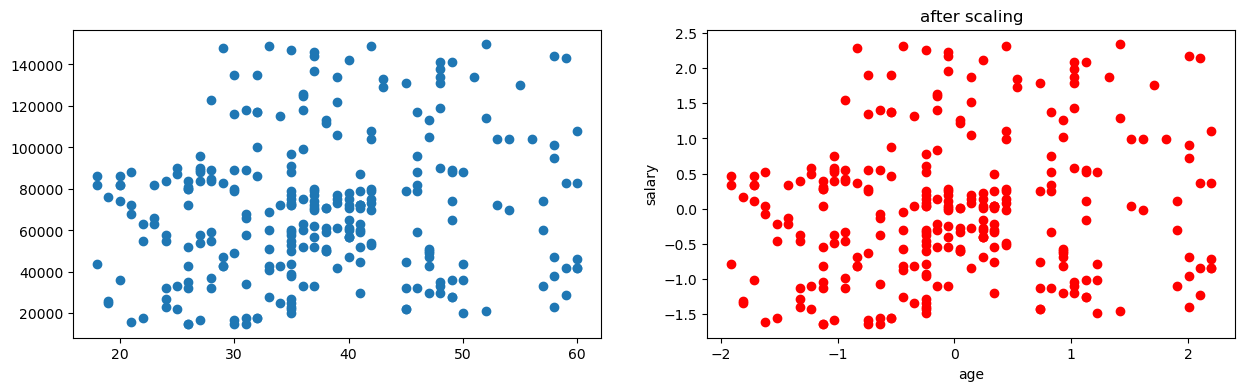

In [27]:
fig,(x1,x2)=plt.subplots(1,2,figsize=(15,4))
x1.scatter(X_train['Age'],X_train['EstimatedSalary'])
plt.title("before")
plt.xlabel("Age")
plt.ylabel("Salary")
x2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.title("after scaling")
plt.xlabel("age")
plt.ylabel("salary")
plt.show()